<a href="https://colab.research.google.com/github/dev3225/Image_Classification_CIFAR-10_dataset/blob/main/Model/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing required libraries, layers, image datasets
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D,BatchNormalization

In [ ]:
#Setting up training parameters
batch_size = 32 
num_classes = 10
epochs = 50
data_augmentation = True

In [ ]:
# The data, shuffled and split between training and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'training samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

170498071/170498071 [==============================] - 3s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 training samples
10000 test samples


Case 1: Relu, Softmax, RMSProp

In [ ]:
#Modeling of the convolution neural network (CNN) for training and classification
model = Sequential()
#Activation function can be anything preferred. Eg. tanh
model.add(Conv2D(32, (3, 3),kernel_initializer='random_normal', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3),kernel_initializer='random_normal', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3),kernel_initializer='random_normal', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

model.add(Conv2D(48, (3, 3),kernel_initializer='random_normal', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

model.add(Conv2D(48, (3, 3),kernel_initializer='random_normal', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

model.add(GlobalMaxPooling2D())
model.add(Dense(500))
model.add(Dropout(0.25))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [ ]:
# Train the model using RMSprop
# Optimizer can be set to Adam with required learning rate
#opt = keras.optimizers.Adam(learning_rater=0.001)   lr is deprecated
model.compile(loss='categorical_crossentropy',
              optimizer='RMSProp',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 activation (Activation)     (None, 30, 30, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 activation_2 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 48)        1

In [ ]:
m1=model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 24s 8ms/step - loss: 1.8672 - accuracy: 0.2919 - val_loss: 1.9266 - val_accuracy: 0.2983
Epoch 2/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5006 - accuracy: 0.4481 - val_loss: 1.4150 - val_accuracy: 0.4798
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3454 - accuracy: 0.5117 - val_loss: 1.2554 - val_accuracy: 0.5484
Epoch 4/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2539 - accuracy: 0.5508 - val_loss: 1.2287 - val_accuracy: 0.5597
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1876 - accuracy: 0.5793 - val_loss: 1.1879 - val_accuracy: 0.5730
Epoch 6/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1387 - accuracy: 0.5952 - val_loss: 1.2252 - val_accuracy: 0.5683
Epoch 7/50
1563/1563 [==============================] - 13s 9ms/step - loss: 1.0991 - accuracy: 0.6109 - val_loss: 1.1671 - val_ac

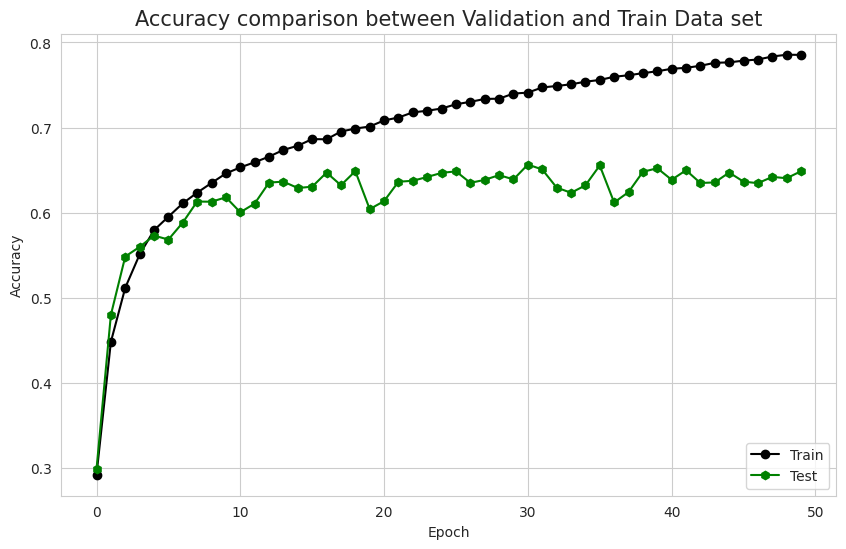

In [ ]:
#Importing libraries required for visualization(plots)
import matplotlib.pyplot as plt
import seaborn as sb
#Visualization of Accuracy for training and test sets
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m1.history['accuracy'],color="black",marker='o')
plt.plot(m1.history['val_accuracy'],color='green',marker='h')
plt.title('Accuracy comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

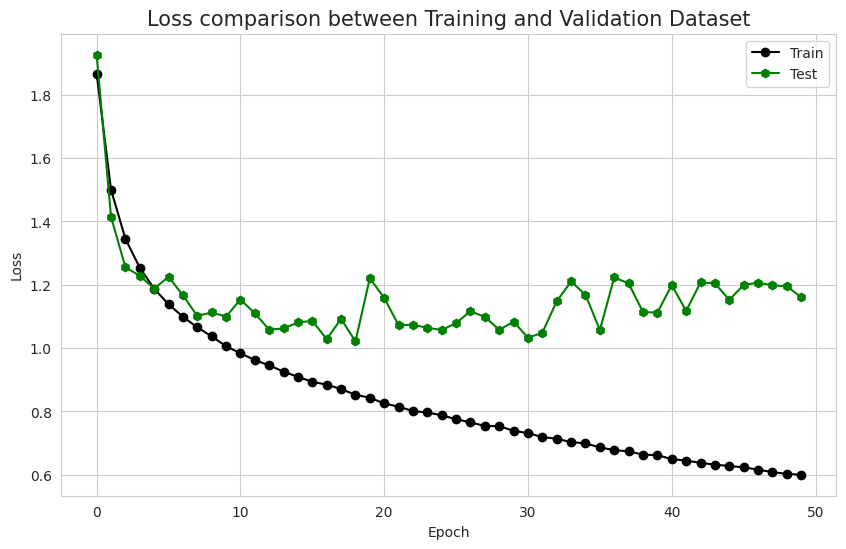

In [ ]:
#Visualization of Loss comparsison for training and test sets
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m1.history['loss'],color="black",marker='o')
plt.plot(m1.history['val_loss'],color='green',marker='h')
plt.title('Loss comparison between Training and Validation Dataset',fontsize=15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

Case 2: tanh, softmax, Adam, No batch normalization

In [ ]:
#Modeling of the convolution neural network (CNN) for training and classification
model = Sequential()

model.add(Conv2D(32, (3, 3),kernel_initializer='random_normal', input_shape=x_train.shape[1:]))
model.add(Activation('tanh'))

model.add(Conv2D(32, (3, 3),kernel_initializer='random_normal', input_shape=x_train.shape[1:]))
model.add(Activation('tanh'))

model.add(Conv2D(32, (3, 3),kernel_initializer='random_normal', input_shape=x_train.shape[1:]))
model.add(Activation('tanh'))

model.add(Conv2D(48, (3, 3),kernel_initializer='random_normal', input_shape=x_train.shape[1:]))
model.add(Activation('tanh'))

model.add(Conv2D(48, (3, 3),kernel_initializer='random_normal', input_shape=x_train.shape[1:]))
model.add(Activation('tanh'))

model.add(GlobalMaxPooling2D())
model.add(Dense(500))
model.add(Dropout(0.25))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [ ]:
# Train the model using Adam
# Optimizer can be set to Adam with required learning rate
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 activation (Activation)     (None, 30, 30, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 activation_2 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 48)        1

In [ ]:
m2=model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 12s 7ms/step - loss: 0.8813 - accuracy: 0.6851 - val_loss: 1.2775 - val_accuracy: 0.5753
Epoch 2/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.9099 - accuracy: 0.6735 - val_loss: 1.1305 - val_accuracy: 0.6072
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9259 - accuracy: 0.6699 - val_loss: 1.1515 - val_accuracy: 0.6050
Epoch 4/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9240 - accuracy: 0.6702 - val_loss: 1.2003 - val_accuracy: 0.5848
Epoch 5/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.9280 - accuracy: 0.6706 - val_loss: 1.1702 - val_accuracy: 0.5988
Epoch 6/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9306 - accuracy: 0.6667 - val_loss: 1.1832 - val_accuracy: 0.5905
Epoch 7/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.9216 - accuracy: 0.6705 - val_loss: 1.1938 - val_ac

KeyboardInterrupt: ignored

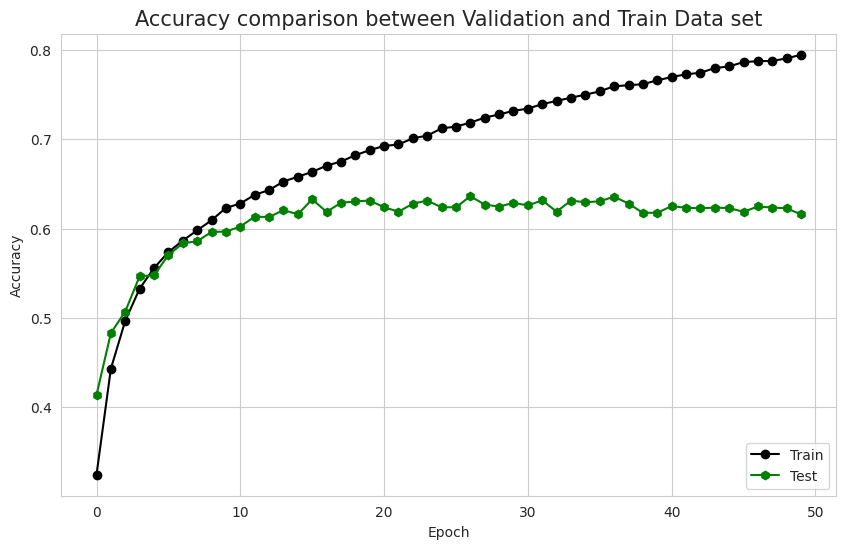

In [ ]:
#Importing libraries required for visualization(plots)
import matplotlib.pyplot as plt
import seaborn as sb
#Visualization of Accuracy for training and test sets
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m2.history['accuracy'],color="black",marker='o')
plt.plot(m2.history['val_accuracy'],color='green',marker='h')
plt.title('Accuracy comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

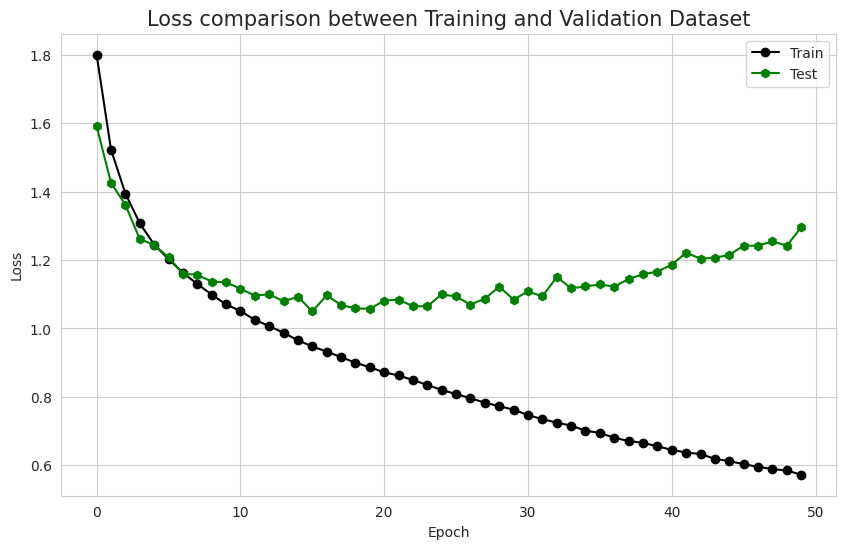

In [ ]:
#Visualization of Loss comparsison for training and test sets
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m2.history['loss'],color="black",marker='o')
plt.plot(m2.history['val_loss'],color='green',marker='h')
plt.title('Loss comparison between Training and Validation Dataset',fontsize=15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()